In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [26]:
df = pd.read_csv('dataset.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

### Dataset Overview & Basic Statistics

In [28]:
df.head(5)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print("\n")

missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

Total Rows: 70,000
Total Columns: 37


No missing values found!


### Emotion Distribution Analysis

In [30]:
emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 
                'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 
                'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 
                'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 
                'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 
                'neutral']

emotion_counts = df[emotion_cols].sum().sort_values(ascending=False)

for emotion, count in emotion_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{emotion:20s}: {count:6,} ({percentage:5.2f}%)")
    
print(f"\nTotal Emotion Labels: {emotion_counts.sum():,}")
print(f"Average Labels per Comment: {emotion_counts.sum() / len(df):.2f}")

neutral             : 18,423 (26.32%)
approval            :  5,928 ( 8.47%)
admiration          :  5,647 ( 8.07%)
annoyance           :  4,443 ( 6.35%)
gratitude           :  3,863 ( 5.52%)
disapproval         :  3,774 ( 5.39%)
curiosity           :  3,267 ( 4.67%)
amusement           :  3,081 ( 4.40%)
optimism            :  2,887 ( 4.12%)
realization         :  2,867 ( 4.10%)
disappointment      :  2,771 ( 3.96%)
love                :  2,745 ( 3.92%)
joy                 :  2,607 ( 3.72%)
anger               :  2,589 ( 3.70%)
confusion           :  2,471 ( 3.53%)
sadness             :  2,193 ( 3.13%)
caring              :  1,988 ( 2.84%)
excitement          :  1,900 ( 2.71%)
surprise            :  1,806 ( 2.58%)
disgust             :  1,704 ( 2.43%)
desire              :  1,248 ( 1.78%)
fear                :  1,048 ( 1.50%)
remorse             :    849 ( 1.21%)
embarrassment       :    817 ( 1.17%)
nervousness         :    598 ( 0.85%)
relief              :    452 ( 0.65%)
pride       

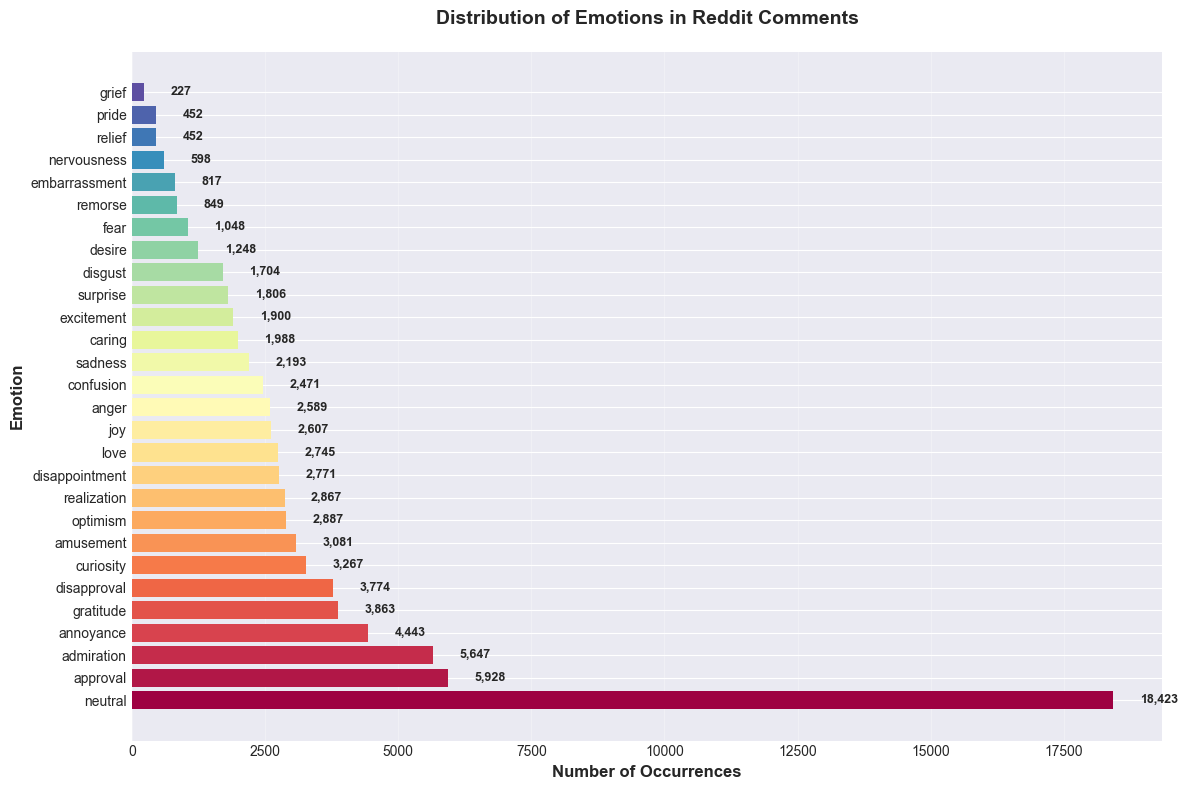

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(emotion_counts)))
bars = ax.barh(emotion_counts.index, emotion_counts.values, color=colors)

for i, (bar, count) in enumerate(zip(bars, emotion_counts.values)):
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=9)

ax.set_xlabel('Number of Occurrences', fontsize=12, fontweight='bold')
ax.set_ylabel('Emotion', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Emotions in Reddit Comments', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

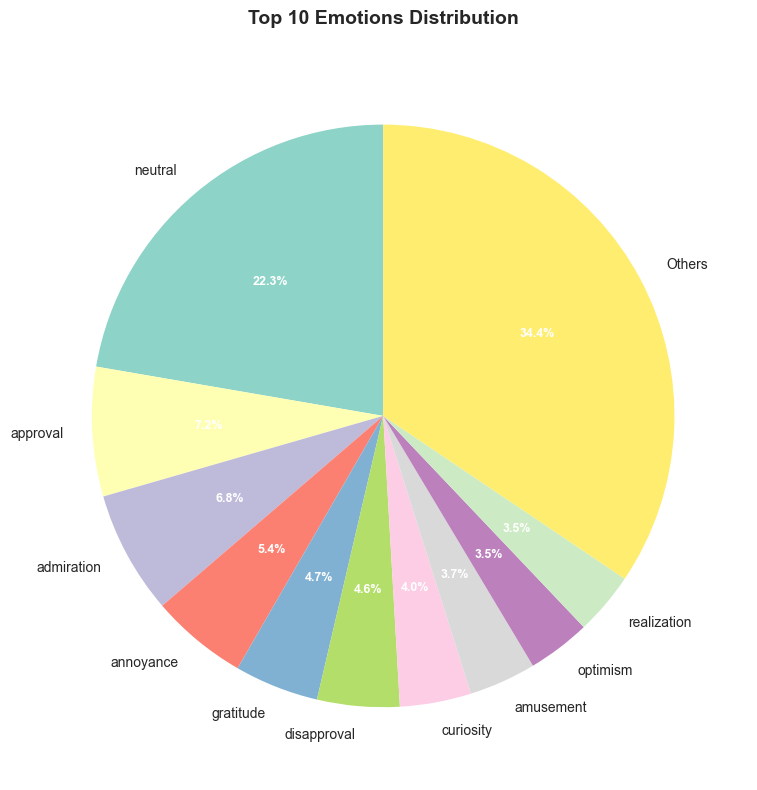

In [32]:
top_10_emotions = emotion_counts.head(10)
others = emotion_counts.iloc[10:].sum()

plot_data = pd.concat([top_10_emotions, pd.Series({'Others': others})])

fig, ax = plt.subplots(figsize=(12, 8))
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(plot_data)))
wedges, texts, autotexts = ax.pie(plot_data.values, labels=plot_data.index, 
                                    autopct='%1.1f%%', startangle=90, 
                                    colors=colors_pie, textprops={'fontsize': 10})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

ax.set_title('Top 10 Emotions Distribution', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Subreddit Analysis

In [33]:
top_subreddits = df['subreddit'].value_counts().head(20)

print("TOP 20 MOST ACTIVE SUBREDDITS")

for i, (subreddit, count) in enumerate(top_subreddits.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. r/{subreddit:30s}: {count:5,} comments ({percentage:5.2f}%)")
    
print(f"\nTotal Unique Subreddits: {df['subreddit'].nunique():,}")

TOP 20 MOST ACTIVE SUBREDDITS
 1. r/cringe                        :   319 comments ( 0.46%)
 2. r/socialanxiety                 :   303 comments ( 0.43%)
 3. r/timberwolves                  :   292 comments ( 0.42%)
 4. r/loveafterlockup               :   281 comments ( 0.40%)
 5. r/AnimalsBeingBros              :   277 comments ( 0.40%)
 6. r/OkCupid                       :   275 comments ( 0.39%)
 7. r/nonononoyes                   :   274 comments ( 0.39%)
 8. r/datingoverthirty              :   274 comments ( 0.39%)
 9. r/TheSimpsons                   :   272 comments ( 0.39%)
10. r/traaaaaaannnnnnnnnns          :   271 comments ( 0.39%)
11. r/minnesotavikings              :   268 comments ( 0.38%)
12. r/gaybros                       :   267 comments ( 0.38%)
13. r/danganronpa                   :   260 comments ( 0.37%)
14. r/exmormon                      :   260 comments ( 0.37%)
15. r/gatekeeping                   :   257 comments ( 0.37%)
16. r/90DayFiance                   :   

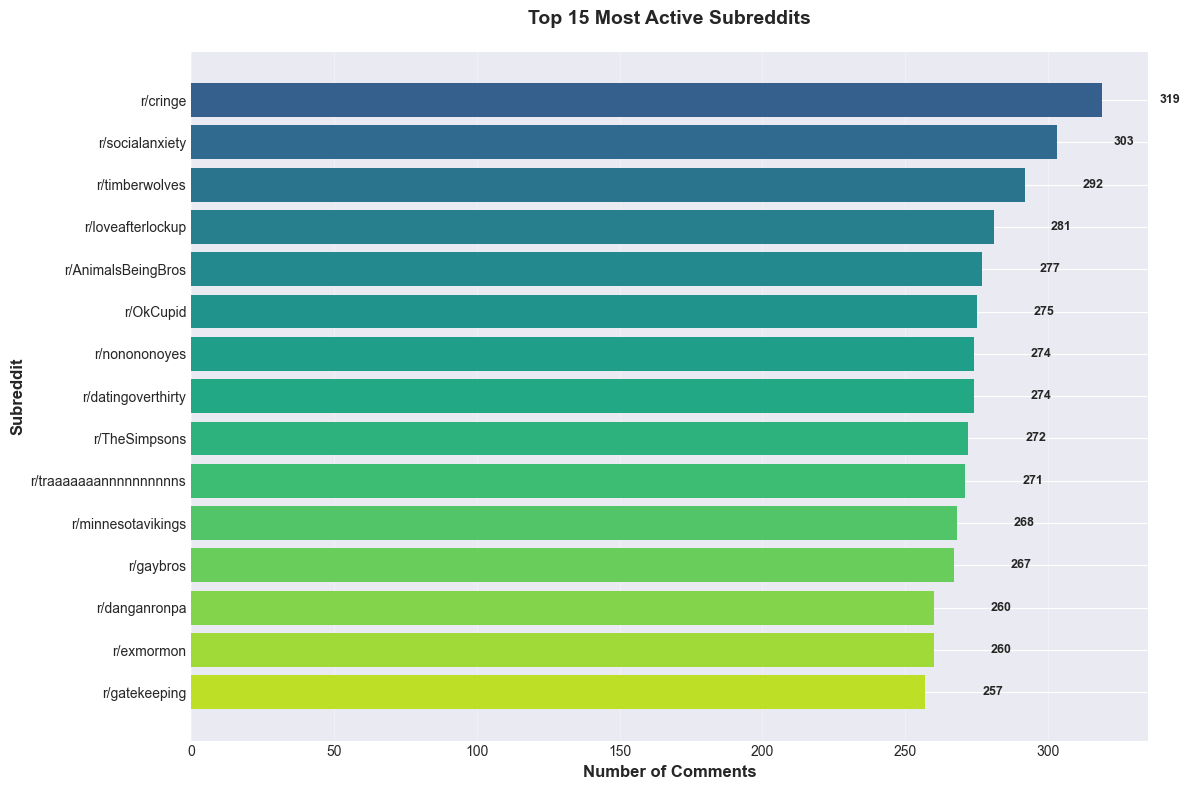

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = top_subreddits.head(15)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_15)))
bars = ax.barh(range(len(top_15)), top_15.values, color=colors)

for i, (bar, count) in enumerate(zip(bars, top_15.values)):
    width = bar.get_width()
    ax.text(width + 20, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=9)

ax.set_yticks(range(len(top_15)))
ax.set_yticklabels([f"r/{name}" for name in top_15.index])
ax.set_xlabel('Number of Comments', fontsize=12, fontweight='bold')
ax.set_ylabel('Subreddit', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Active Subreddits', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Emotion Heatmap by Top Subreddits

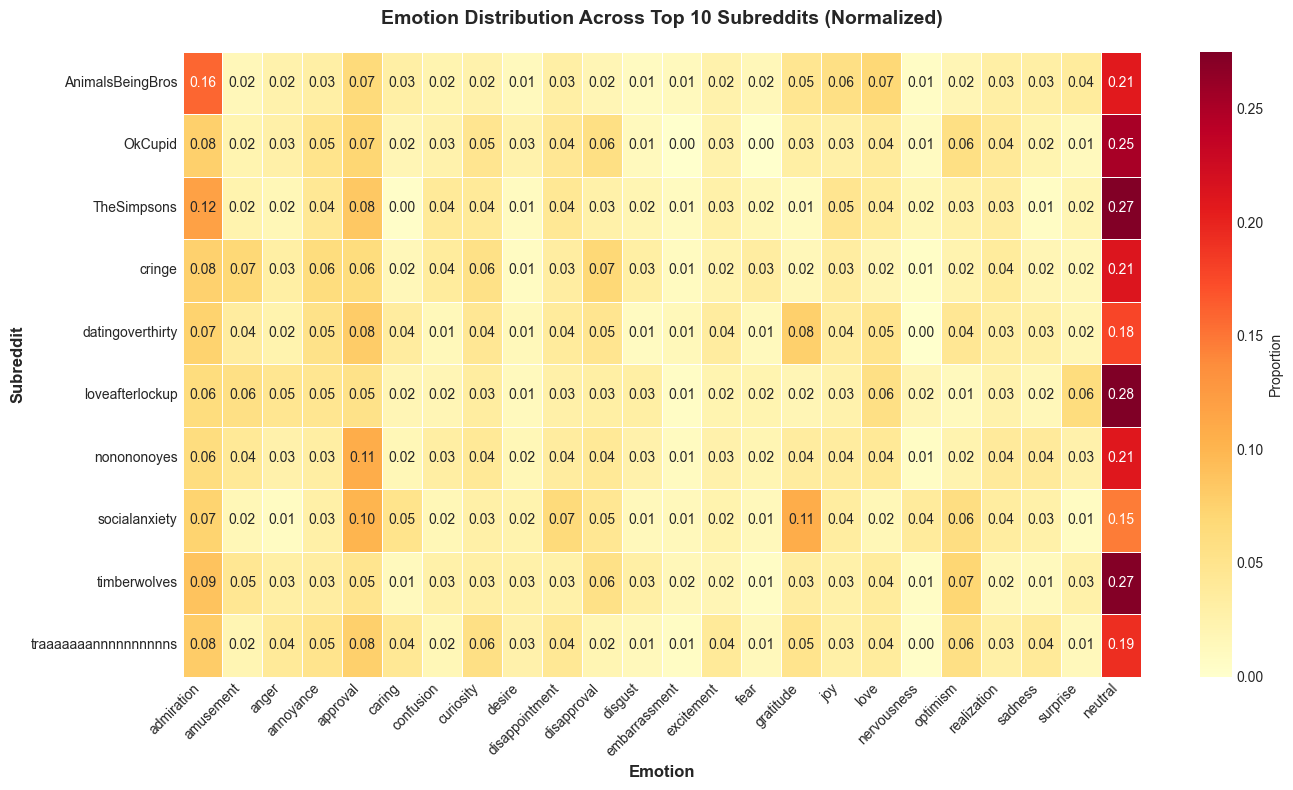

In [35]:
# Membuat heatmap emosi untuk top 10 subreddit
top_10_subs = df['subreddit'].value_counts().head(10).index
emotion_by_sub = df[df['subreddit'].isin(top_10_subs)].groupby('subreddit')[emotion_cols].mean()

# Hanya tampilkan emosi yang signifikan (rata-rata > 0.01)
significant_emotions = emotion_by_sub.mean()[emotion_by_sub.mean() > 0.01].index
emotion_by_sub_filtered = emotion_by_sub[significant_emotions]

# Normalisasi untuk visualisasi lebih baik
emotion_by_sub_normalized = emotion_by_sub_filtered.div(emotion_by_sub_filtered.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(emotion_by_sub_normalized, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Proportion'}, linewidths=0.5, ax=ax)
ax.set_xlabel('Emotion', fontsize=12, fontweight='bold')
ax.set_ylabel('Subreddit', fontsize=12, fontweight='bold')
ax.set_title('Emotion Distribution Across Top 10 Subreddits (Normalized)', 
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Text Analysis

In [36]:
# Analisis panjang teks
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("TEXT LENGTH STATISTICS")

print(f"Average Character Length: {df['text_length'].mean():.2f}")
print(f"Median Character Length: {df['text_length'].median():.2f}")
print(f"Max Character Length: {df['text_length'].max():,}")
print(f"Min Character Length: {df['text_length'].min()}")
print(f"\nAverage Word Count: {df['word_count'].mean():.2f}")
print(f"Median Word Count: {df['word_count'].median():.2f}")
print(f"Max Word Count: {df['word_count'].max():,}")
print(f"Min Word Count: {df['word_count'].min()}")

TEXT LENGTH STATISTICS
Average Character Length: 69.42
Median Character Length: 67.00
Max Character Length: 703
Min Character Length: 3

Average Word Count: 13.02
Median Word Count: 13.00
Max Word Count: 33
Min Word Count: 1


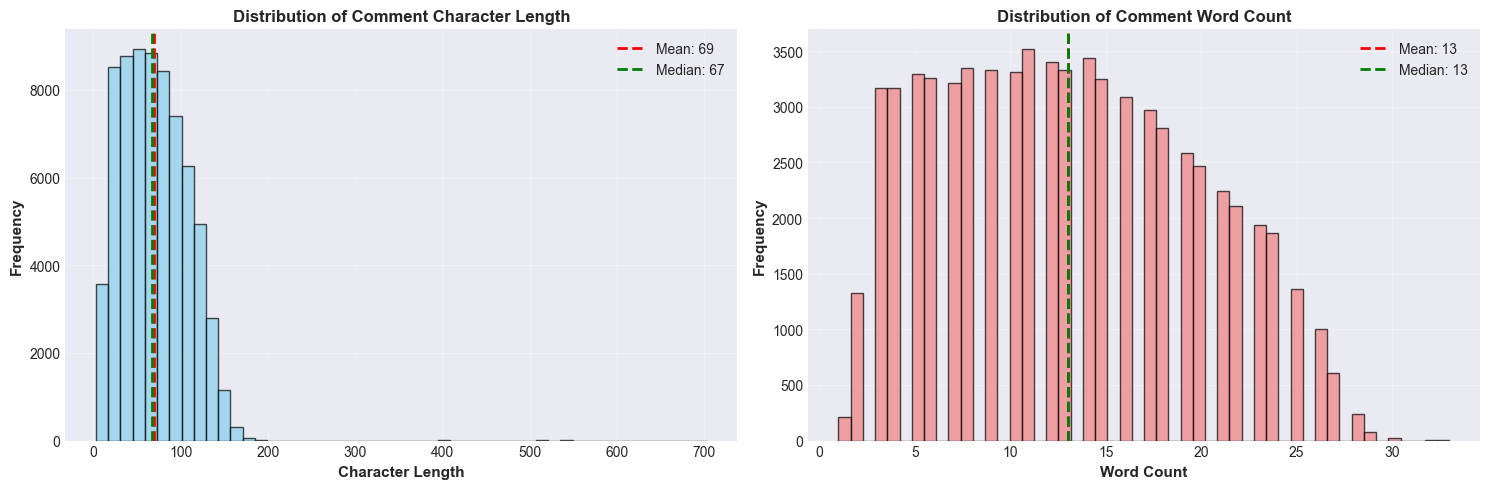

In [37]:
# Distribusi panjang teks
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram untuk character length
axes[0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["text_length"].mean():.0f}')
axes[0].axvline(df['text_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["text_length"].median():.0f}')
axes[0].set_xlabel('Character Length', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Comment Character Length', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histogram untuk word count
axes[1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.0f}')
axes[1].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["word_count"].median():.0f}')
axes[1].set_xlabel('Word Count', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Comment Word Count', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Temporal Analysis

In [38]:
# Konversi timestamp ke datetime
df['datetime'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

print("TEMPORAL INFORMATION")

print(f"Date Range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Time Span: {(df['datetime'].max() - df['datetime'].min()).days} days")

TEMPORAL INFORMATION
Date Range: 2019-01-01 00:00:19 to 2019-01-31 23:57:48
Time Span: 30 days


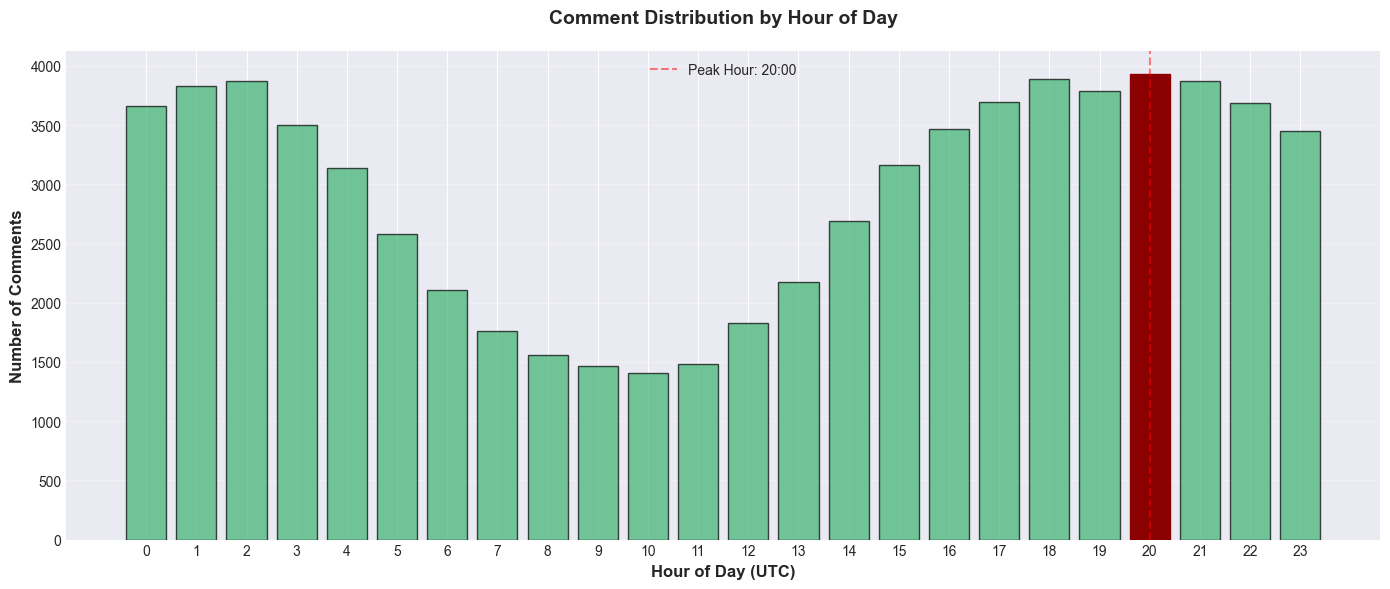

Peak posting hour: 20:00 UTC with 3,931 comments


In [39]:
# Distribusi komentar per jam
hourly_dist = df['hour'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(hourly_dist.index, hourly_dist.values, color='mediumseagreen', edgecolor='black', alpha=0.7)

# Highlight peak hours
max_hour = hourly_dist.idxmax()
bars[max_hour].set_color('darkred')
bars[max_hour].set_alpha(1.0)

ax.set_xlabel('Hour of Day (UTC)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
ax.set_title('Comment Distribution by Hour of Day', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(24))
ax.grid(axis='y', alpha=0.3)
ax.axvline(max_hour, color='red', linestyle='--', alpha=0.5, label=f'Peak Hour: {max_hour}:00')
ax.legend()
plt.tight_layout()
plt.show()

print(f"Peak posting hour: {max_hour}:00 UTC with {hourly_dist[max_hour]:,} comments")

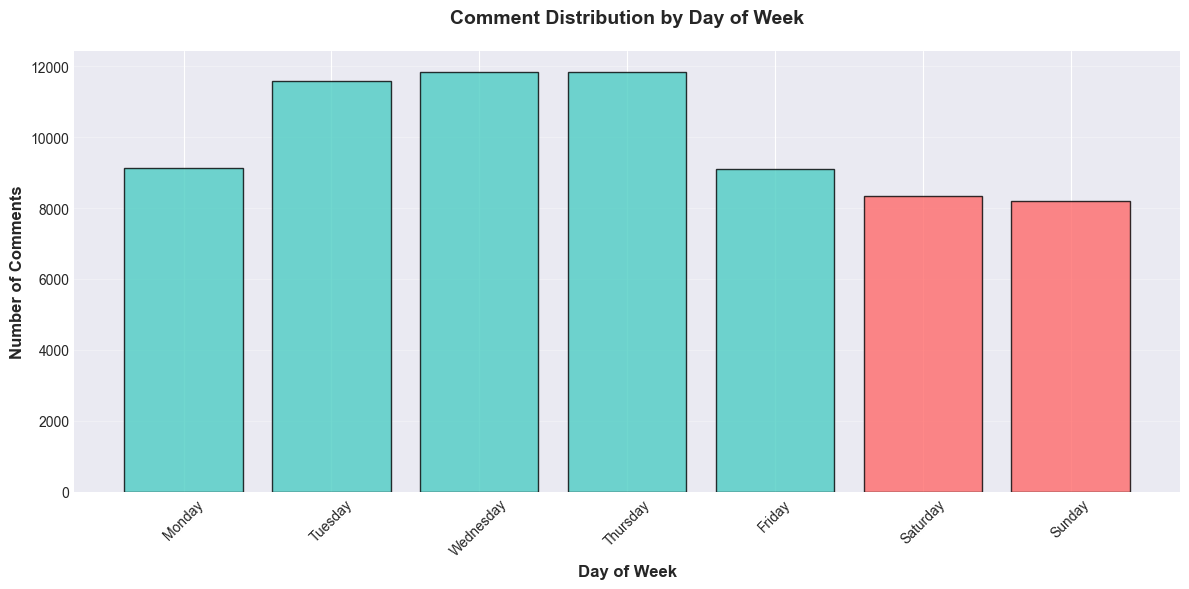

In [40]:
# Distribusi komentar per hari dalam seminggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dist = df['day_of_week'].value_counts().reindex(day_order)

fig, ax = plt.subplots(figsize=(12, 6))
colors_day = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in day_order]
bars = ax.bar(day_order, day_dist.values, color=colors_day, edgecolor='black', alpha=0.8)

ax.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
ax.set_title('Comment Distribution by Day of Week', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multi-Label Analysis (emosi dalam 1 komentar > 1)

In [41]:
# Analisis jumlah label per komentar
df['num_emotions'] = df[emotion_cols].sum(axis=1)

print("MULTI-LABEL STATISTICS")

emotion_dist = df['num_emotions'].value_counts().sort_index()
for num_emotions, count in emotion_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{num_emotions} emotion(s): {count:6,} comments ({percentage:5.2f}%)")

print(f"\nAverage emotions per comment: {df['num_emotions'].mean():.2f}")
print(f"Max emotions in a comment: {df['num_emotions'].max()}")

MULTI-LABEL STATISTICS
0 emotion(s):  1,129 comments ( 1.61%)
1 emotion(s): 56,984 comments (81.41%)
2 emotion(s): 10,291 comments (14.70%)
3 emotion(s):  1,404 comments ( 2.01%)
4 emotion(s):    137 comments ( 0.20%)
5 emotion(s):     29 comments ( 0.04%)
6 emotion(s):     14 comments ( 0.02%)
7 emotion(s):      8 comments ( 0.01%)
8 emotion(s):      2 comments ( 0.00%)
9 emotion(s):      2 comments ( 0.00%)

Average emotions per comment: 1.18
Max emotions in a comment: 9


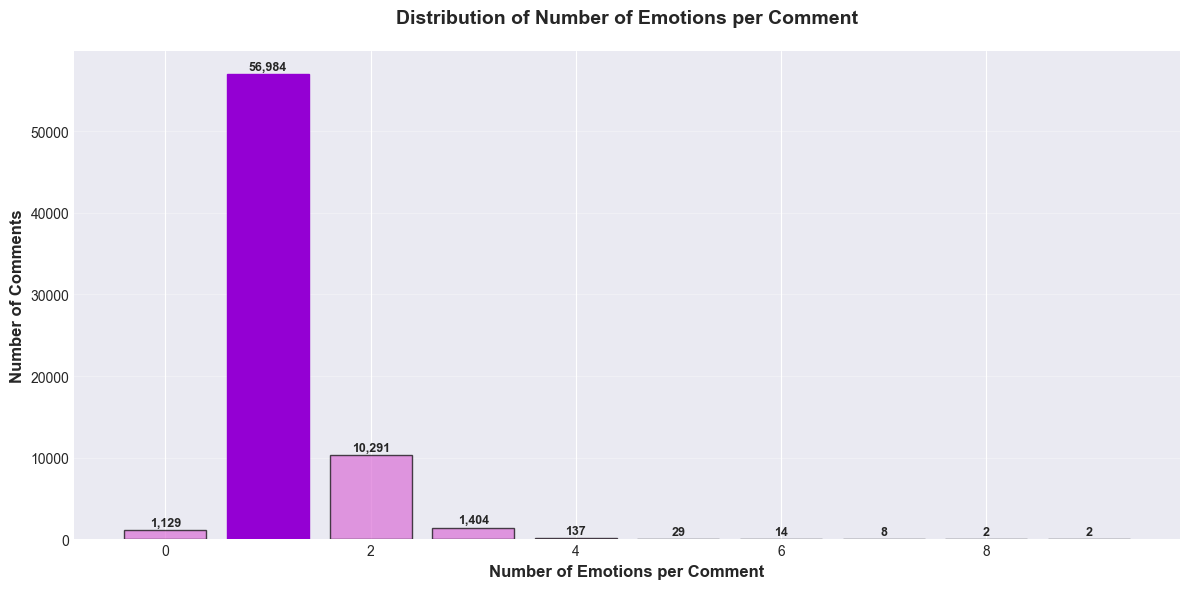

In [42]:
# Visualisasi distribusi jumlah emosi per komentar
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(emotion_dist.index, emotion_dist.values, color='orchid', edgecolor='black', alpha=0.7)

# Highlight the mode
mode_emotions = emotion_dist.idxmax()
bars[mode_emotions].set_color('darkviolet')
bars[mode_emotions].set_alpha(1.0)

for i, (num, count) in enumerate(emotion_dist.items()):
    ax.text(num, count + 200, f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Number of Emotions per Comment', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Number of Emotions per Comment', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Emotion Co-occurrence Analysis

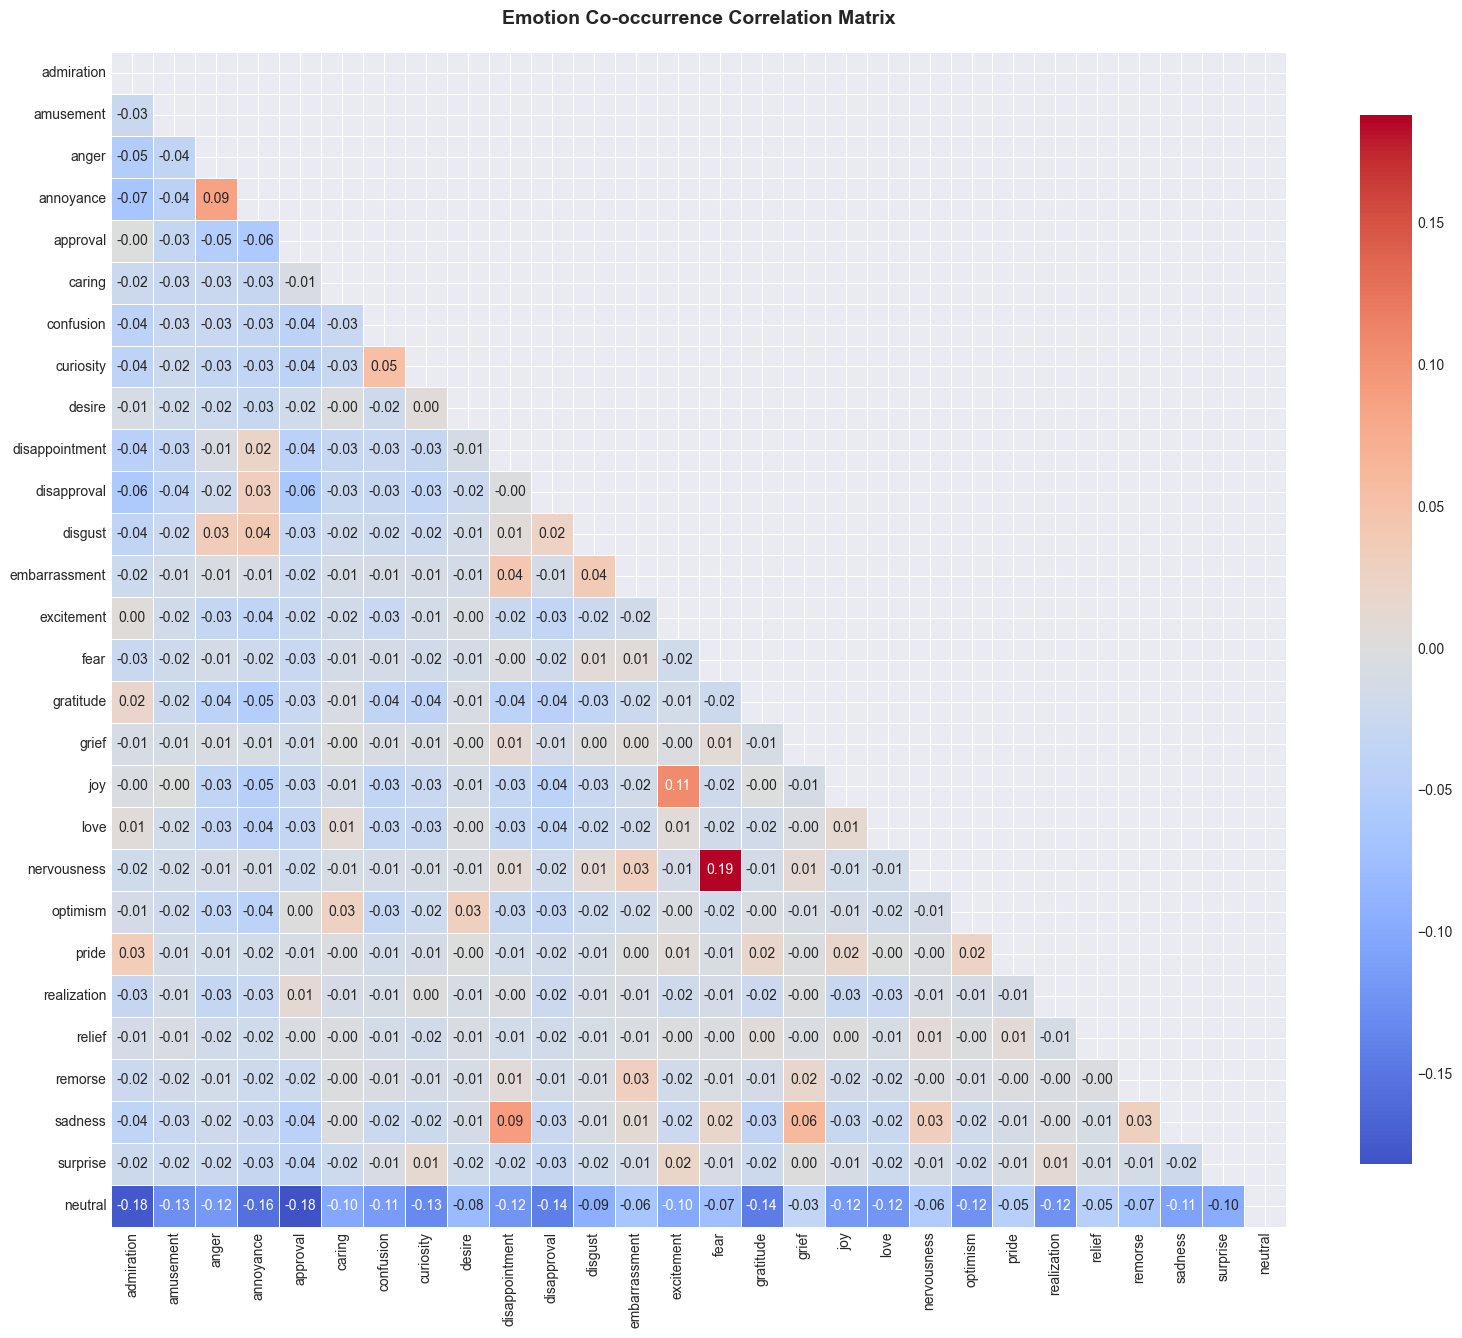

In [43]:
# Membuat matriks korelasi antar emosi
emotion_corr = df[emotion_cols].corr()

fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(emotion_corr, dtype=bool))
sns.heatmap(emotion_corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Emotion Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

TOP 15 EMOTION PAIRS (CO-OCCURRENCE)
 1. admiration      + approval       :   477 times
 2. anger           + annoyance      :   444 times
 3. admiration      + gratitude      :   390 times
 4. annoyance       + disapproval    :   362 times
 5. disappointment  + sadness        :   302 times
 6. excitement      + joy            :   299 times
 7. approval        + realization    :   287 times
 8. confusion       + curiosity      :   261 times
 9. approval        + optimism       :   248 times
10. annoyance       + disappointment :   248 times
11. admiration      + love           :   240 times
12. annoyance       + disgust        :   214 times
13. approval        + gratitude      :   211 times
14. admiration      + joy            :   194 times
15. admiration      + optimism       :   189 times


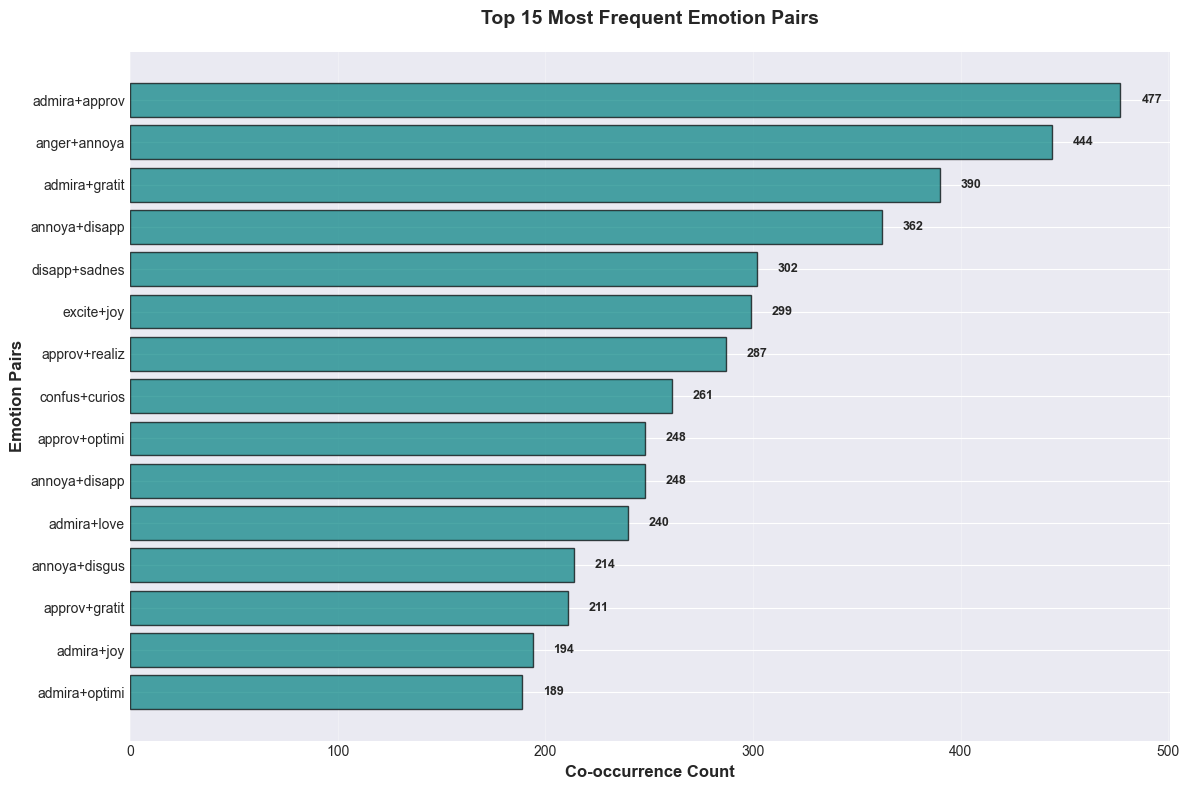

In [44]:
# Top 10 pasangan emosi yang paling sering muncul bersamaan
from itertools import combinations

# Hitung co-occurrence untuk setiap pasangan emosi
co_occurrence = {}
for comment_emotions in df[emotion_cols].values:
    active_emotions = [emotion_cols[i] for i, val in enumerate(comment_emotions) if val == 1]
    if len(active_emotions) >= 2:
        for pair in combinations(sorted(active_emotions), 2):
            co_occurrence[pair] = co_occurrence.get(pair, 0) + 1

# Sort dan ambil top 15
top_pairs = sorted(co_occurrence.items(), key=lambda x: x[1], reverse=True)[:15]

print("=" * 80)
print("TOP 15 EMOTION PAIRS (CO-OCCURRENCE)")
print("=" * 80)
for i, (pair, count) in enumerate(top_pairs, 1):
    print(f"{i:2d}. {pair[0]:15s} + {pair[1]:15s}: {count:5,} times")
    
# Visualisasi
pairs_labels = [f"{p[0][0][:6]}+{p[0][1][:6]}" for p in top_pairs]
pairs_counts = [p[1] for p in top_pairs]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(pairs_labels)), pairs_counts, color='teal', edgecolor='black', alpha=0.7)

for i, (bar, count) in enumerate(zip(bars, pairs_counts)):
    width = bar.get_width()
    ax.text(width + 10, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=9)

ax.set_yticks(range(len(pairs_labels)))
ax.set_yticklabels(pairs_labels)
ax.set_xlabel('Co-occurrence Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Emotion Pairs', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Frequent Emotion Pairs', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

### Rater Analysis

In [45]:
# Analisis rater
print("=" * 80)
print("RATER STATISTICS")
print("=" * 80)
print(f"Total Unique Raters: {df['rater_id'].nunique()}")
print(f"\nComments per Rater:")
rater_dist = df['rater_id'].value_counts()
print(f"  Mean: {rater_dist.mean():.2f}")
print(f"  Median: {rater_dist.median():.2f}")
print(f"  Min: {rater_dist.min()}")
print(f"  Max: {rater_dist.max()}")

print(f"\nUnclear Comments:")
unclear_count = df['example_very_unclear'].sum()
unclear_pct = (unclear_count / len(df)) * 100
print(f"  Total: {unclear_count:,} ({unclear_pct:.2f}%)")
print(f"  Clear: {len(df) - unclear_count:,} ({100 - unclear_pct:.2f}%)")

RATER STATISTICS
Total Unique Raters: 81

Comments per Rater:
  Mean: 864.20
  Median: 707.00
  Min: 2
  Max: 3498

Unclear Comments:
  Total: 1,129 (1.61%)
  Clear: 68,871 (98.39%)


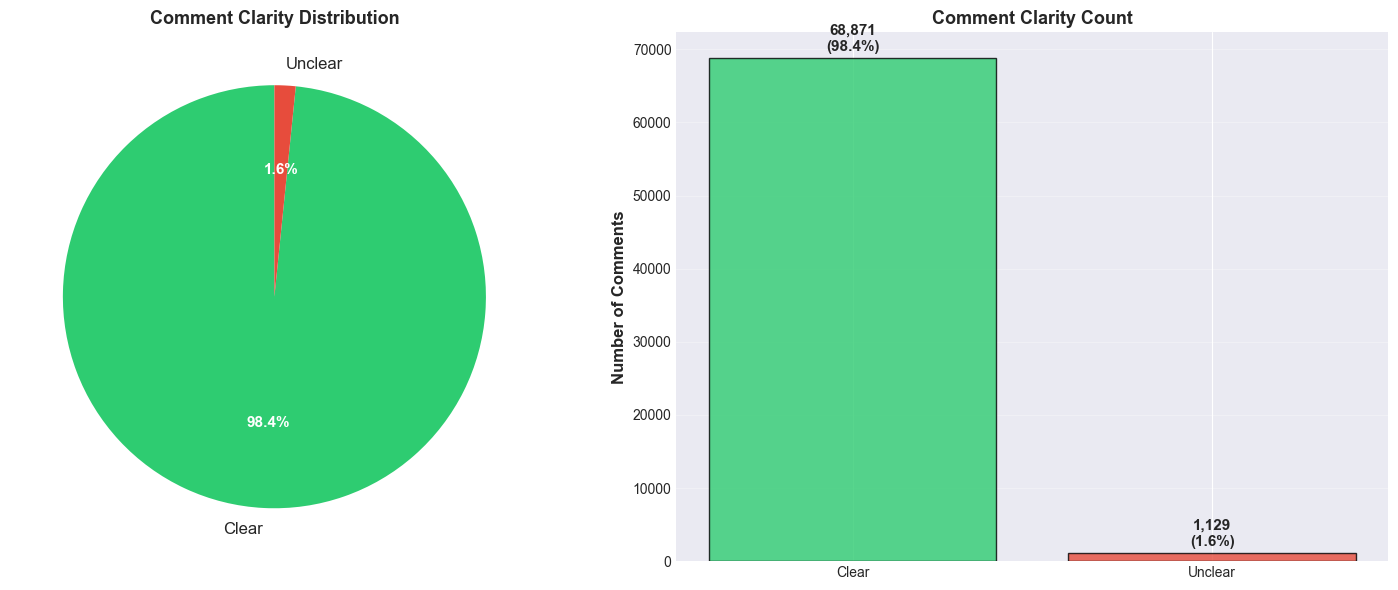

In [46]:
# Visualisasi distribusi clarity
clarity_counts = df['example_very_unclear'].value_counts()
clarity_labels = ['Clear', 'Unclear']
clarity_values = [clarity_counts.get(False, 0), clarity_counts.get(True, 0)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors_clarity = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = axes[0].pie(clarity_values, labels=clarity_labels, autopct='%1.1f%%', 
                                         startangle=90, colors=colors_clarity, textprops={'fontsize': 12})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
axes[0].set_title('Comment Clarity Distribution', fontsize=13, fontweight='bold')

# Bar chart
bars = axes[1].bar(clarity_labels, clarity_values, color=colors_clarity, edgecolor='black', alpha=0.8)
for bar, val in zip(bars, clarity_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 500, 
                f'{val:,}\n({val/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
axes[1].set_title('Comment Clarity Count', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Word Cloud berhasil dibuat dan disimpan sebagai 'wordcloud_result.png'


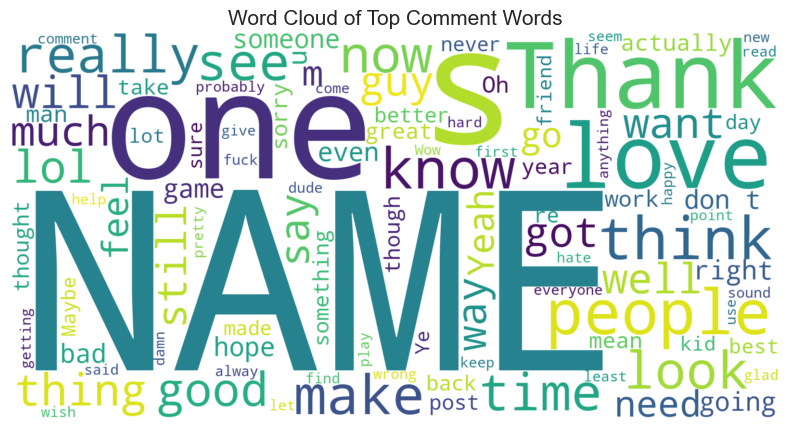

In [ ]:
TEXT_COLUMN = 'text'
text_data = df[TEXT_COLUMN].dropna().astype(str)
full_text = " ".join(text_data)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    colormap='viridis',
    contour_width=1,
    contour_color='steelblue'
).generate(full_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Top Comment Words', fontsize=15)

Text(0.5, 1.0, 'Word Cloud of Subreddit Frequency')

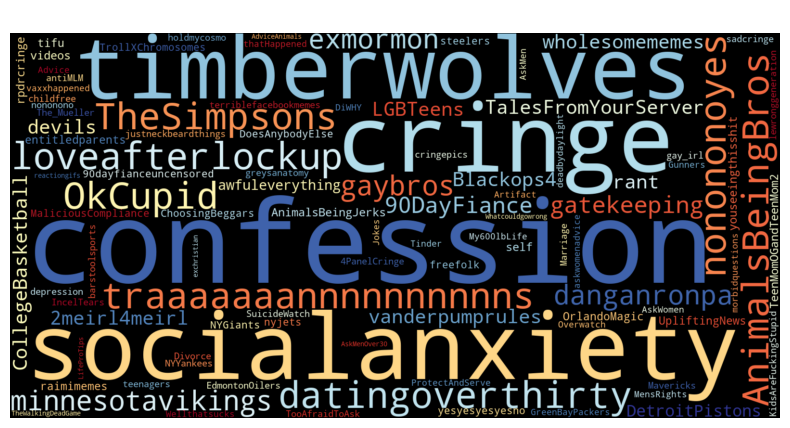

In [53]:
SUBREDDIT_COLUMN = 'subreddit'
subreddit_data = df[SUBREDDIT_COLUMN].dropna().astype(str)
full_text_subreddit = " ".join(subreddit_data)
stopwords = set(STOPWORDS)

wordcloud_subreddit = WordCloud(
    width=1600,
    height=800,
    background_color='black',
    stopwords=stopwords,
    max_words=100,
    colormap='RdYlBu', 
    contour_width=1,
    contour_color='yellow'
).generate(full_text_subreddit)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_subreddit, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Subreddit Frequency', fontsize=15, color='white')

### Key Insights Summary

In [48]:
# Ringkasan insight utama
print("=" * 80)
print("KEY INSIGHTS FROM EDA")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total comments: {len(df):,}")
print(f"   - Date range: {df['datetime'].min().date()} to {df['datetime'].max().date()}")
print(f"   - Unique subreddits: {df['subreddit'].nunique():,}")
print(f"   - Unique raters: {df['rater_id'].nunique()}")

print("\n2. EMOTION DISTRIBUTION:")
top_3_emotions = emotion_counts.head(3)
print(f"   - Most common: {top_3_emotions.index[0]} ({top_3_emotions.values[0]:,})")
print(f"   - Second: {top_3_emotions.index[1]} ({top_3_emotions.values[1]:,})")
print(f"   - Third: {top_3_emotions.index[2]} ({top_3_emotions.values[2]:,})")
print(f"   - Avg emotions per comment: {df['num_emotions'].mean():.2f}")

print("\n3. SUBREDDIT INSIGHTS:")
top_sub = top_subreddits.index[0]
print(f"   - Most active: r/{top_sub} ({top_subreddits.values[0]:,} comments)")
print(f"   - Top 10 subreddits account for {(top_subreddits.head(10).sum()/len(df)*100):.1f}% of data")

print("\n4. TEXT CHARACTERISTICS:")
print(f"   - Avg character length: {df['text_length'].mean():.0f}")
print(f"   - Avg word count: {df['word_count'].mean():.1f}")

print("\n5. TEMPORAL PATTERNS:")
print(f"   - Peak hour: {hourly_dist.idxmax()}:00 UTC ({hourly_dist.max():,} comments)")
print(f"   - Most active day: {day_dist.idxmax()} ({day_dist.max():,} comments)")

print("\n6. DATA QUALITY:")
print(f"   - Clear comments: {(100 - unclear_pct):.1f}%")
print(f"   - Unclear comments: {unclear_pct:.1f}%")

print("\n" + "=" * 80)

KEY INSIGHTS FROM EDA

1. DATASET OVERVIEW:
   - Total comments: 70,000
   - Date range: 2019-01-01 to 2019-01-31
   - Unique subreddits: 483
   - Unique raters: 81

2. EMOTION DISTRIBUTION:
   - Most common: neutral (18,423)
   - Second: approval (5,928)
   - Third: admiration (5,647)
   - Avg emotions per comment: 1.18

3. SUBREDDIT INSIGHTS:
   - Most active: r/cringe (319 comments)
   - Top 10 subreddits account for 4.1% of data

4. TEXT CHARACTERISTICS:
   - Avg character length: 69
   - Avg word count: 13.0

5. TEMPORAL PATTERNS:
   - Peak hour: 20:00 UTC (3,931 comments)
   - Most active day: Thursday (11,839 comments)

6. DATA QUALITY:
   - Clear comments: 98.4%
   - Unclear comments: 1.6%

